In [6]:
from oyv.imports import *
import os
import gsw
from scipy.optimize import curve_fit

In [7]:
os.chdir('/home/oyvindl/work/code/git_public/ice_ocean_plume/')
%run ice_ocean_plume.py
os.chdir('/home/oyvindl/work/projects/barents_glaciers/glacierocean-austfonna/'
         'plume_model/data/make_profiles/idealized_constantN')
dummy_ = np.arange(200)
ioplume = plume(10, 100, dummy_, dummy_, dummy_, 2)
ioplume.set_params()

In [8]:
def get_tempsal(DEP, TTOP, TBTM, SBTM, N2, dz =1, rho0 = 1027):
    dep = np.arange(0, DEP+dz/2, dz)
    n = len(dep)
    temp = TTOP + np.arange(n)/n*(TBTM-TTOP)
    
    dtemp_dz = -np.diff(temp)/dz
    dsal_dz = (ioplume.BT*dtemp_dz - N2/ioplume.g)/ioplume.BS
    sal = np.concatenate([np.array([SBTM]), SBTM + np.cumsum(dsal_dz)])[::-1]
    
    drho_dz = rho0*(ioplume.BS*dsal_dz - ioplume.BT*dtemp_dz)
    n2 = -ioplume.g/rho0*drho_dz
    return temp, sal, dep, n2

In [9]:
%matplotlib inline

## Load data


In [10]:
ddir = '/home/oyvindl/work/projects/barents_glaciers/glacierocean-austfonna/data/'
# M1 mooring
m1 = pickle_load(ddir + 'm1_mooring/data/collected/m1_concerto_collected.p')
# Advance rates
adv = pickle_load(ddir + 'glacier_fronts/python/SS_HB_ADVRATES.p')
# Runoff
run = pickle_load(ddir + 'runoff/data/runoff_storisstraumen_2014_2022.p')

In [11]:
ti = date2num(adv.time)
ti_day = np.arange(date2num(adv.time)[0], date2num(adv.time)[-1]+1)

In [12]:
SS_W = 26700 # Width of storisstraumen (estimated from shapefiles)

In [13]:
Q0 = ip.interp1(date2num(run.t), rs(run.runoff_storisstraumen, 15).mean, ti)/SS_W

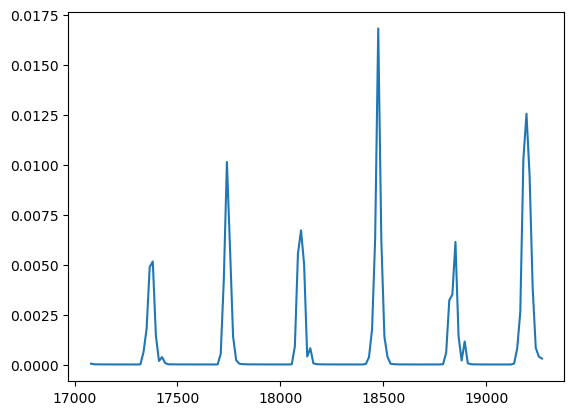

In [14]:
fig, ax = plt.subplots()
#ax.plot(date2num(run.t), rs(run.runoff_storisstraumen, 1).mean)
ax.plot(ti, Q0)

In [15]:
### Ocean profiles

In [16]:
Q0 = ip.interp1(date2num(run.t), rs(run.runoff_storisstraumen, 15).mean, ti)/SS_W

In [18]:
import gsw

In [101]:
T20_daily, t = stats.dmean(m1.ctd_20m.T, (m1.ctd_20m.time), td = ti_day)
T90_daily, t = stats.dmean(m1.ctd_90m.T, (m1.ctd_90m.time), td = ti_day)

SP20_daily, t = stats.dmean(m1.ctd_20m.SP, (m1.ctd_20m.time), td = ti_day)
SP90_daily, t = stats.dmean(m1.ctd_90m.SP, (m1.ctd_90m.time), td = ti_day)

SA20_daily = gsw.SA_from_SP(SP20_daily, 20, 79, 31)
CT20_daily = gsw.CT_from_t(SA20_daily, T20_daily, 20)
rho20_daily = gsw.rho(SA20_daily, CT20_daily, 20)

SA90_daily = gsw.SA_from_SP(SP90_daily, 95, 79, 31)
CT90_daily = gsw.CT_from_t(SA90_daily, T90_daily, 95)
rho90_daily = gsw.rho(SA90_daily, CT90_daily, 95)

drho = rho90_daily - rho20_daily

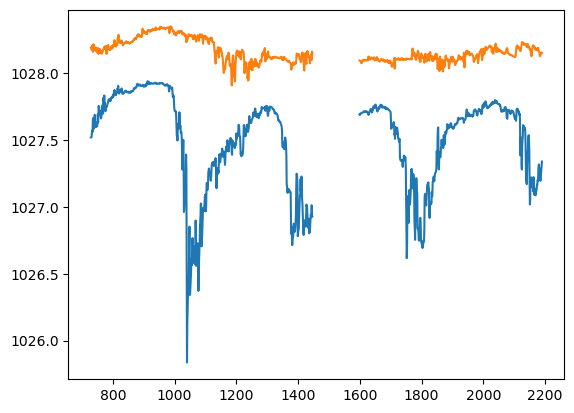

In [50]:
fig, ax = plt.subplots()
ax.plot(rho20_daily)
ax.plot(rho90_daily)

In [46]:
gsw.rho?

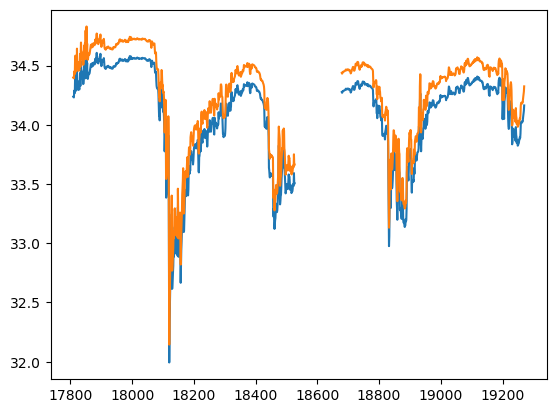

In [45]:
fig, ax = plt.subplots()
#ax.plot(m1.ctd_20m.time, m1.ctd_20m.T)
ax.plot(ti_day, SP20_daily)
ax.plot(ti_day, SA20_daily)

In [57]:
T20i = ip.interp1((ti_day), rs(T20_daily, 15).mean, ti)
T90i = ip.interp1((ti_day), rs(T90_daily, 15).mean, ti)

SP20i = ip.interp1((ti_day), rs(SP20_daily, 15).mean, ti)
SP90i = ip.interp1((ti_day), rs(SP90_daily, 15).mean, ti)

In [58]:
ti_day

array([17080., 17081., 17082., ..., 19268., 19269., 19270.])

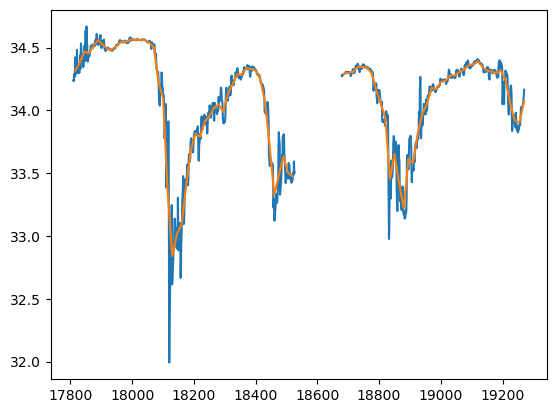

In [59]:
fig, ax = plt.subplots()
#ax.plot(m1.ctd_20m.time, m1.ctd_20m.T)
ax.plot(ti_day, SP20_daily)
ax.plot(ti, SP20i)

In [62]:
zi[20]

20

In [77]:
zi = np.arange(0, 96)
Nz = len(zi)
Nt = len(ti)
TARR = np.ma.zeros([Nz, Nt])
SARR = np.ma.zeros([Nz, Nt])

for nn in np.arange(Nt):
    TARR[:20, nn] = T20i[nn]
    TARR[20:, nn] = T20i[nn] + (T90i[nn]-T20i[nn])*np.arange(Nz-20)/(Nz-20-1)
    SARR[:20, nn] = SP20i[nn]
    SARR[20:, nn] = SP20i[nn] + (SP90i[nn]-SP20i[nn])*np.arange(Nz-20)/(Nz-20-1)


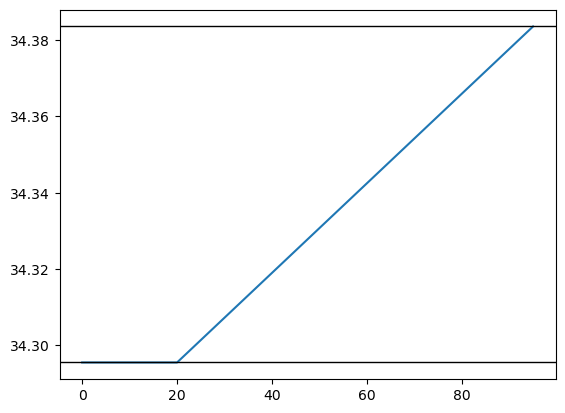

In [79]:
fig, ax = plt.subplots()
nn = 140
ax.plot( zi, SARR[:,nn ])
pl.hline(SP20i[nn], ax)
pl.hline(SP90i[nn], ax)

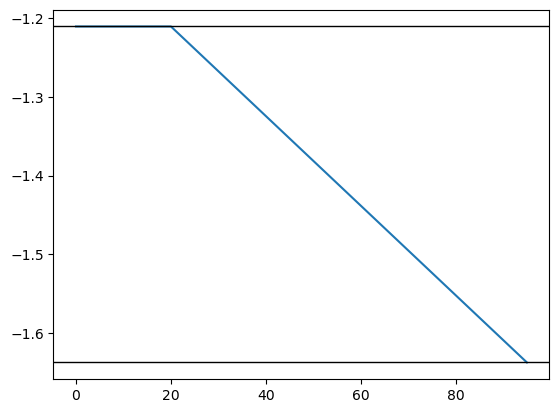

In [78]:
fig, ax = plt.subplots()
nn = 140
ax.plot( zi, TARR[:,nn ])
pl.hline(T20i[nn], ax)
pl.hline(T90i[nn], ax)

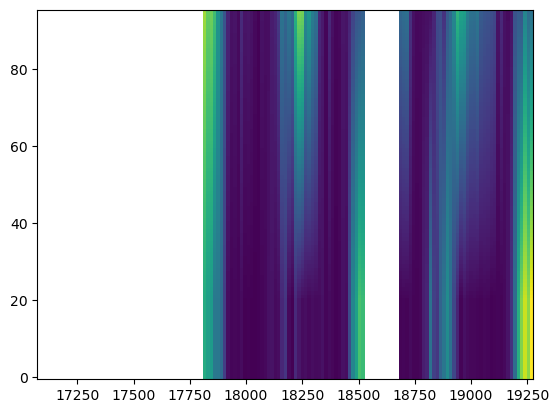

In [65]:
fig, ax = plt.subplots()
ax.pcolormesh(ti, zi, TARR)

In [ ]:
m1.ctd_20m.keys()

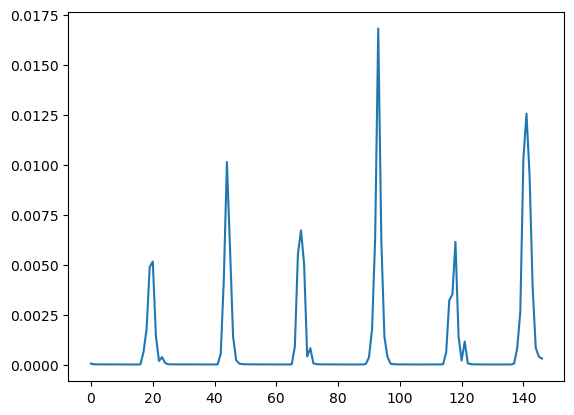

In [138]:
fig, ax = plt.subplots()
ax.plot(Q0)

In [166]:
M = np.ma.zeros(Nt)*np.nan
M.mask = M.data+1
M1 = np.ma.zeros(Nt)*np.nan
M1.mask = M.data+1


Mmax = np.ma.zeros(Nt)*np.nan
Mmax.mask = M.data+1
M1max = np.ma.zeros(Nt)*np.nan
M1max.mask = M.data+1

q0_ = np.ma.zeros(Nt)*np.nan

Mdiag = np.ma.zeros(Nt)
for nn in np.arange(Nt):
    if not SARR[:, nn].mask.all():

        qfact = 10
        
        q0 = np.max([Q0[nn], 0.0000])
        P = plume(95, q0*qfact, TARR[:, nn], SARR[:, nn], zi)
        P.set_params()
        P.solve()
    
        M[nn] = P.melt_total
        Mmax[nn] = P.M_pl.max()

        
        q0 = np.max([Q0[nn], 0.0005])
        P = plume(95, q0*qfact, TARR[:, nn], SARR[:, nn], zi)
        P.set_params()
        P.solve()
        
        lab = '%.0e m2/s'%Q0[nn]
        M1[nn] = P.melt_total
        M1max[nn] = P.M_pl.max()

        Mdiag[nn] = 1
        
        
        
        q0_[nn] = q0
    else:
        Mdiag[nn] = 2


LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integrati

LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)


(16970.5, 19379.5)

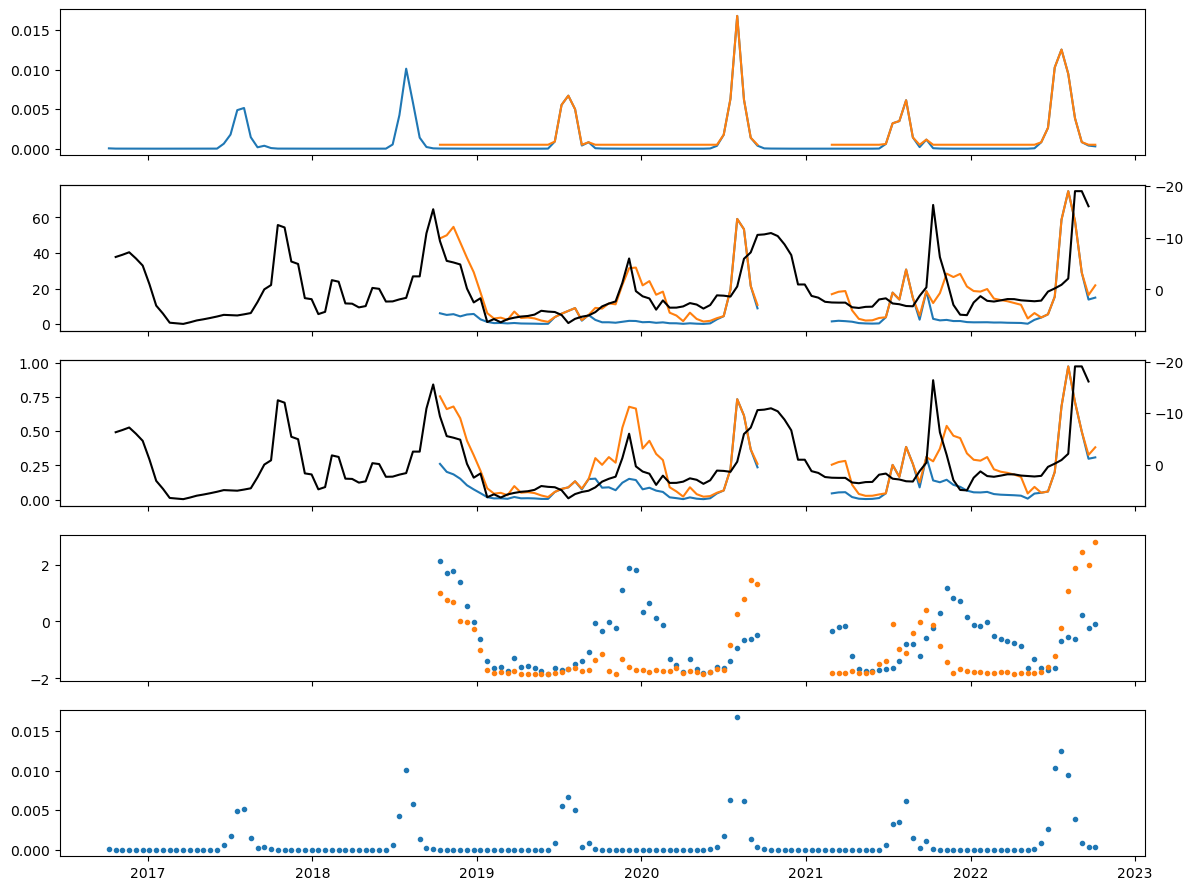

In [167]:
fig, ax = plt.subplots(5, 1, sharex = True, figsize = (14, 11))
ax[0].plot_date(ti, Q0, '-')
ax[0].plot_date(ti, q0_, '-')

ax[1].plot_date(ti, M*86400, '-')
ax[1].plot_date(ti, M1*86400, '-')


ax[2].plot_date(ti, Mmax*86400, '-')
ax[2].plot_date(ti, M1max*86400, '-')


#ax.plot_date(ti, SP90i, '.')
#ax.plot_date(ti, SP20i, '.')
#ax.plot_date(ti, SARR[10, :], '.')

ax[3].plot_date(ti, T90i, '.')
ax[3].plot_date(ti, T20i, '.')

xl = ax[0].get_xlim()

ax[4].plot_date(ti, Q0, '.')
tw2 = ax[1].twinx()
tw2.plot(ti,adv.storis, 'k')
tw2.invert_yaxis()

tw2 = ax[2].twinx()
tw2.plot(ti,adv.storis, 'k')
tw2.invert_yaxis()
ax[0].set_xlim(xl)
#ax.plot_date(ti, TARR[10, :], '.')


### Correlations

In [175]:
calc.corr(adv.storis, (0.5*(T20i+T90i)*75 + T20i*20)/95)

-0.759888711611514

In [190]:
adv.storis.mask

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [213]:
def pearsonr_mod(A, B):
    
    common_ind = np.bool_((~A.mask) * (~B.mask))
    a = A[common_ind]
    b = B[common_ind]
    p = pearsonr(a, b)
    return p

In [228]:
rboth = pearsonr_mod(adv.storis, (0.5*(T20i+T90i)*75 + T20i*20)/95)
r20 = pearsonr_mod(adv.storis, T20i)
r90 = pearsonr_mod(adv.storis, T90i)
rrunoff = pearsonr(adv.storis, Q0)

In [231]:
print(rrunoff)

PearsonRResult(statistic=-0.020839708319061928, pvalue=0.8021711246171409)


In [233]:
rboth

PearsonRResult(statistic=-0.8166497381721004, pvalue=5.369693283753394e-22)

In [234]:
r20

PearsonRResult(statistic=-0.8206203981485933, pvalue=2.3126060220862934e-22)

In [215]:
mask

PearsonRResult(statistic=-0.8166497381721004, pvalue=5.369693283753394e-22)

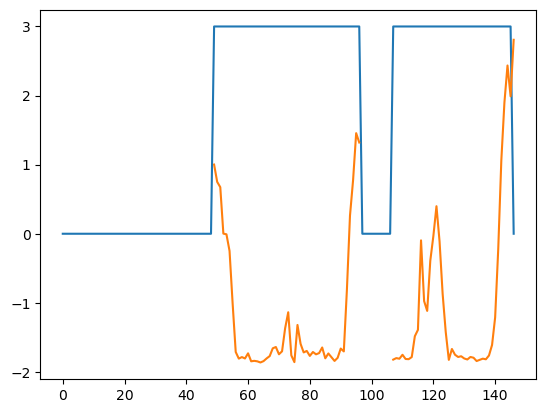

In [203]:
fig, ax = plt.subplots()
ax.plot(mask*3)
ax.plot(T20i)



In [182]:
calc.corr??

In [206]:
from scipy.stats import pearsonr

In [205]:
pearsonr(adv.storis, (0.5*(T20i+T90i)*75 + T20i*20)/95)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [180]:
pearsonr(adv.storis,T20i)

PearsonRResult(statistic=-0.08659896638671125, pvalue=0.29696955353529386)

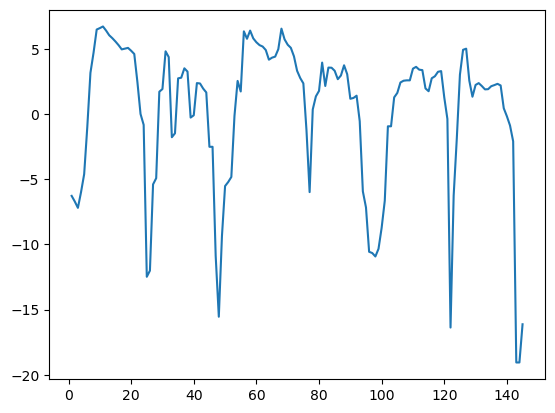

In [235]:
fig, ax = plt.subplots()
ax.plot(adv.storis)

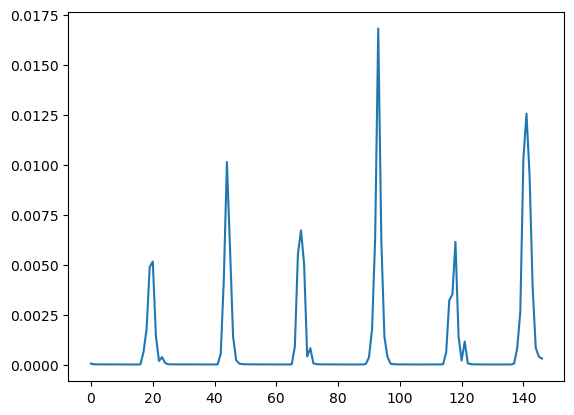

In [236]:
fig, ax = plt.subplots()
ax.plot(Q0)

In [170]:
calc.corr(adv.storis, T20i)

-0.7460846736815678

In [171]:
calc.corr(adv.storis, T90i)

-0.43637451826872964

In [172]:
calc.corr(adv.storis, Q0)

0.003064406977861493

In [ ]:


#### Quick test case (Warm deep water)

In [ ]:
### Universal parameters
DEP = 100
SBTM = 34.7
N2 = 1e-5
dz = 1

In [ ]:
temp, sal, dep, n2 = get_tempsal(DEP, 2, 2, SBTM, N2, dz = dz)

In [ ]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (8, 2.5))
ax[0].plot(temp, dep)
ax[1].plot(sal, dep)
ax[2].plot(n2, dep[:-1]+dz/2)
ax[0].set_title('T')
ax[1].set_title('S')
ax[2].set_title('N2')
ax[0].set_ylabel('Depth')

ax[2].invert_yaxis()

In [ ]:
fig, ax = plt.subplots(1, 4, sharey = True, figsize = (10, 4))

for volfl in [1e-2, 1e-1, 1e0]:
    P = plume(DEP, volfl, temp, sal, dep)
    P.set_params()
    P.solve()
    lab = '%.0e m2/s'%volfl
    
    ax[0].plot(P.D_pl, P.dep_pl)
    ax[1].plot(P.U_pl, P.dep_pl)
    ax[2].plot(P.M_pl, P.dep_pl)
    ax[3].plot(P.dRho_pl, P.dep_pl, label = lab)
    pl.hline(P.neut_dep, ax = ax[3], alpha = 0.3)
    pl.hline(P.min_dep, ax = ax[2], alpha = 0.3)

pl.vline(0, ax[3], alpha = 0.6, ls = ':')
ax[3].legend(fontsize = 9)
ax[0].set_title('D')
ax[1].set_title('U')
ax[2].set_title('M')
ax[3].set_title('dRho')

ax[0].set_xlim(0, 50)
ax[0].set_ylim(105, 0)

#### Quick test case (Warm surface water)

In [ ]:
temp, sal, dep, n2 = get_tempsal(DEP, 2, 0, SBTM, N2, dz = dz)

In [ ]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (8, 2.5))
ax[0].plot(temp, dep)
ax[1].plot(sal, dep)
ax[2].plot(n2, dep[:-1]+dz/2)
ax[0].set_title('T')
ax[1].set_title('S')
ax[2].set_title('N2')
ax[0].set_ylabel('Depth')

ax[2].invert_yaxis()

In [ ]:
fig, ax = plt.subplots(1, 4, sharey = True, figsize = (10, 4))

for volfl in [1e-2, 1e-1, 1e0]:
    P = plume(DEP, volfl, temp, sal, dep)
    P.set_params()
    P.solve()
    lab = '%.0e m2/s'%volfl
    
    ax[0].plot(P.D_pl, P.dep_pl)
    ax[1].plot(P.U_pl, P.dep_pl)
    ax[2].plot(P.M_pl, P.dep_pl)
    ax[3].plot(P.dRho_pl, P.dep_pl, label = lab)
    pl.hline(P.neut_dep, ax = ax[3], alpha = 0.3)
    pl.hline(P.min_dep, ax = ax[2], alpha = 0.3)

pl.vline(0, ax[3], alpha = 0.6, ls = ':')
ax[3].legend(fontsize = 9)
ax[0].set_title('D')
ax[1].set_title('U')
ax[2].set_title('M')
ax[3].set_title('dRho')

ax[0].set_xlim(0, 50)
ax[0].set_ylim(105, 0)

In [ ]:
P.melt_total

### Systematic experiments

In [ ]:
### Universal parameters
DEP = 100
TTOPS = np.arange(-2, 4.01, 1/3)
TBTMS = np.arange(-2, 4.5, 1/3)
SBTM = 34.7
N2 = 1e-4

In [ ]:
# Empty (nan) arrays
melt_integrated = np.zeros([len(TTOPS), len(TBTMS)])*np.nan
melt_max = melt_integrated.copy()
melt_mean = melt_integrated.copy()
neut_dep = melt_integrated.copy()
min_dep = melt_integrated.copy()

In [ ]:
volfl = 1e-2

count = 1
Ncount = len(melt_max.flatten())
for nn, Ttop in enumerate(TTOPS):
    for mm, Tbtm in enumerate(TBTMS):

        print('Plume %i/%i..\r'%(count, Ncount), end = '')
        
        temp, sal, dep, n2 = get_tempsal(DEP, Ttop, Tbtm, SBTM, N2, dz = dz)
        P = plume(DEP, volfl, temp, sal, dep)
        P.set_params()
        P.solve(suppress_endmsg = True)
        
        
        melt_integrated[nn, mm] = P.melt_total
        melt_max[nn, mm] = P.M_pl.max()
        melt_mean[nn, mm] = P.melt_total/(P.dep0-P.min_dep)
        neut_dep[nn, mm] = P.neut_dep
        min_dep[nn, mm] = P.min_dep

        count+=1

In [ ]:
fig, ax = plt.subplots(1, 5, sharex = True, sharey = True, figsize = (14, 4))
for axn in ax:
    axn.set_aspect('equal')
    
fact1 = 1e3
    
C0 = ax[0].contourf(TTOPS, TBTMS, fact1*melt_integrated.T)
C1 = ax[1].contourf(TTOPS, TBTMS, melt_max.T)
C2 = ax[2].contourf(TTOPS, TBTMS, melt_mean.T)
C3 = ax[3].contourf(TTOPS, TBTMS, neut_dep.T)
C4 = ax[4].contourf(TTOPS, TBTMS, min_dep.T)

cb1 = plt.colorbar(C0, ax = ax[0], location = 'top',)
cb2 = plt.colorbar(C1, ax = ax[1], location = 'top', )
cb3 = plt.colorbar(C2, ax = ax[2], location = 'top', )
cb4 = plt.colorbar(C3, ax = ax[3], location = 'top', )
cb5 = plt.colorbar(C4, ax = ax[4], location = 'top', )

ax[0].set_title('Total (integrated) melt ')
ax[1].set_title('Maximum melt rate')
ax[2].set_title('Mean melt rate *in* plume')
ax[3].set_title('Neutral depth')
ax[4].set_title('Minimum depth')


ax[0].set_ylabel('Bottom temperature')
for axn in ax:
    axn.set_xlabel('Top temperature')
    
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()
ax.contourf(TTOPS, TBTMS, neut_dep.T)

In [ ]:
temp, sal, dep, n2 = get_tempsal(DEP, 4, -1, SBTM, N2, dz = dz)
volfl = 1e-2
P = plume(DEP, volfl, temp, sal, dep)
P.set_params()
P.solve(suppress_endmsg = True)

In [ ]:
temp2, sal2, dep2, n2 = get_tempsal(DEP, -1, 4, SBTM, N2, dz = dz)
volfl = 1e-2
P2 = plume(DEP, volfl, temp2, sal2, dep2)
P2.set_params()
P2.solve(suppress_endmsg = True)

In [ ]:
fig, ax = plt.subplots(1, 6, sharey = True, figsize = (15, 3))
ax[0].plot(P.T_pl, P.dep_pl)
ax[0].plot(P2.T_pl, P2.dep_pl)

ax[0].plot(P.Ta_pl, P.dep_pl, ls = ':', color = col.col('b'))
ax[0].plot(P2.Ta_pl, P2.dep_pl, ls = ':', color = col.col('o'))

ax[1].plot(P.U_pl, P.dep_pl)
ax[1].plot(P2.U_pl, P2.dep_pl)

ax[2].plot(P.E_pl, P.dep_pl)
ax[2].plot(P2.E_pl, P2.dep_pl)

ax[3].plot(P.M_pl, P.dep_pl)
ax[3].plot(P2.M_pl, P2.dep_pl)

ax[4].plot(P.dRho_pl, P.dep_pl)
ax[4].plot(P2.dRho_pl, P2.dep_pl)

ax[5].plot(P.D_pl, P.dep_pl)
ax[5].plot(P2.D_pl, P2.dep_pl)

ax[5].set_xlim(0, 50)
for axn, title in zip(ax, ['Tpl', 'U', 'E', 'M', 'dRho', 'D']):
    axn.grid()
    axn.set_title(title)
    pl.hline(P.neut_dep, ax = axn, ls = '--', col = col.col('b'))
    pl.hline(P2.neut_dep, ax = axn, ls = '--', col = col.col('o'))
    pl.hline(P.min_dep, ax = axn, ls = '-', col = col.col('b'))
    pl.hline(P2.min_dep, ax = axn, ls = '-', col = col.col('o'))
ax[0].set_ylim(102, -2)


## Reproduce the functional dependence of M on temperature and discharge

From Beckmann et al:

Large Qsg:
    $$M\propto \Delta T\ (q_{SG})^{1/3}$$
    
    
Small Qsg:
    $$M\propto \Delta T^{3/2}$$

### Large discharge:



##### Dependence on thermal driving

In [ ]:
P.Tf_a

In [ ]:
Tf = -1.82

In [ ]:
volfl = 1e-1

Trange = np.arange(Tf, 2.1, 0.1)
M_to_neut = Trange*0
M_total = Trange*0
M_max = Trange*0

for nn, T in enumerate(Trange):
    print('Plume: %.2fC..\r'%T, end = '' )
    temp, sal, dep, n2 = get_tempsal(DEP, T, T, SBTM, N2, dz = dz)
    P = plume(DEP, volfl, temp, sal, dep)
    P.set_params()
    P.solve(suppress_endmsg = True)
    M_to_neut[nn] = P.melt_to_neutral
    M_total[nn] = P.melt_total
    M_max[nn] = P.M_pl.max()

In [ ]:
# Fit 

def f(x, A, b,):
    M = A*x**b
    return M

a_, b_ = curve_fit(f, Trange-Tf, M_to_neut, )[0]

In [ ]:
fig, ax = plt.subplots()
ax.plot(Trange-Tf, M_to_neut)
ax.plot(Trange-Tf, [f(T, a_, b_) for T in Trange+1.8], label = '%.e $\\times$ T ^(%.2f)'%(a_, b_))
ax.legend()

##### Dependence on Q

In [ ]:
T = 2

Qexp = np.arange(-1, 0, 0.01)
Qrange = 10**(Qexp)



M_to_neut_q = Qrange*0
M_total_q = Qrange*0
M_max_q = Qrange*0

temp, sal, dep, n2 = get_tempsal(DEP, T, T, SBTM, N2, dz = dz)

for nn, Q in enumerate(Qrange):
    print('Plume: %.2f m2/s..\r'%Q, end = '' )
    P = plume(DEP, Q, temp, sal, dep)
    P.set_params()
    P.solve(suppress_endmsg = True)
    M_to_neut_q[nn] = P.melt_to_neutral
    M_total_q[nn] = P.melt_total
    M_max_q[nn] = P.M_pl.max()


In [ ]:
def f(x, A, b,):
    M = A*x**b
    return M

In [ ]:
aQ_, bQ_ = curve_fit(f, Qrange, M_to_neut_q, )[0]

In [ ]:
fig, ax = plt.subplots()
ax.plot(Qrange, M_to_neut_q)
ax.plot(Qrange, [f(q, aQ_, bQ_) for q in Qrange], label = '%.e $\\times$ Q ^(%.2f)'%(aQ_, bQ_))
ax.legend()

### Small discharge

In [ ]:
volfl = 1e-3

Trange = np.arange(-1, 6.1, 0.1)
M_to_neut = Trange*0
M_total = Trange*0
M_max = Trange*0

for nn, T in enumerate(Trange):
    print('Plume: %.2fC..\r'%T, end = '' )
    temp, sal, dep, n2 = get_tempsal(DEP, T, T, SBTM, N2, dz = dz)
    P = plume(DEP, volfl, temp, sal, dep, T0melt = True)
    P.set_params()
    P.solve(suppress_endmsg = True)
    M_to_neut[nn] = P.melt_to_neutral
    M_total[nn] = P.melt_total
    M_max[nn] = P.M_pl.max()

In [ ]:
# Fit 

def f(x, A, b,):
    M = A*x**b
    return M

a_, b_ = curve_fit(f, Trange+1.8, M_to_neut, )[0]

In [ ]:
P.S_pl

In [ ]:
fig, ax = plt.subplots()
ax.plot(Trange+1.8, M_to_neut)
ax.plot(Trange+1.8, [f(T, a_, b_) for T in Trange+1.8], label = '%.e $\\times$ T ^(%.2f)'%(a_, b_))
ax.legend()